In [11]:
import pandas as pd 
from sklearn import linear_model
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import numpy as np
from scipy import stats

df = pd.read_csv('day.csv')

colors = ["cornflowerblue", "indianred", "darkseagreen", "plum", "dimgray"]

In [12]:
target = 'cnt'
y = df[target]

In [13]:
df= df.drop(columns=['casual','registered','instant','dteday','mnth','yr'])

In [14]:
X = df.copy()
X = X.drop(target, axis=1)
X = pd.get_dummies(X,columns=['season','weekday','weathersit'])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
model = KNeighborsRegressor().fit(X_train, y_train)
predicciones = model.predict(X_test)

r2_score(y_pred=predicciones, y_true=y_test)

0.39657519431297283

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = KNeighborsRegressor().fit(X_train_scaled, y_train)
predicciones = model.predict(X_test_scaled)

r2_score(y_pred=predicciones, y_true=y_test)

0.43254838674846496

In [18]:
nn = []
r2 = []
r2_train = []
for i in range(1,60):
    model = KNeighborsRegressor(n_neighbors=i).fit(X_train_scaled, y_train)
    predicciones = model.predict(X_test_scaled)
    r2.append(r2_score(y_pred=predicciones, y_true=y_test))
    nn.append(i)
    predicciones_train = model.predict(X_train_scaled)
    r2_train.append(r2_score(y_pred=predicciones_train, y_true=y_train))

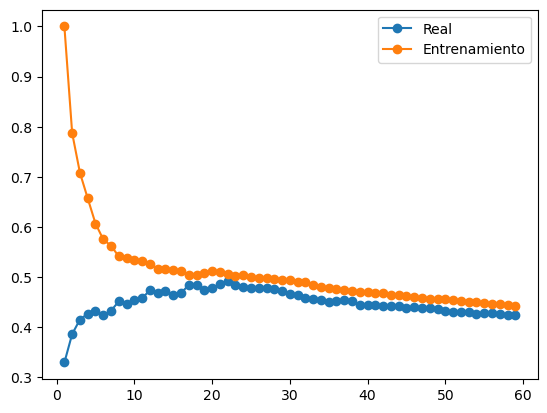

In [19]:
## Grafica los resultados
resultados = pd.DataFrame({
    'nn': nn,
    'r2': r2,
    'r2_train': r2_train
})

plt.plot(resultados.nn, resultados.r2, marker = 'o', label = "Real")
plt.plot(resultados.nn, resultados.r2_train, marker = 'o', label = "Entrenamiento")
plt.legend()

In [23]:
vecinos_optimos = resultados[resultados.r2 == max(resultados.r2)].nn.values[0]
vecinos_optimos

22

In [24]:
model = KNeighborsRegressor(n_neighbors=vecinos_optimos).fit(X_train_scaled, y_train)
predicciones = model.predict(X_test_scaled)
r2_score(y_pred=predicciones, y_true=y_test)

0.4930925241585855